In [1]:
import sys
sys.path.append('../build/Debug')
from libkinematic_calibration import KinematicCalibration
%pylab inline
np.set_printoptions(precision=6, suppress=True)

Populating the interactive namespace from numpy and matplotlib


In [2]:
def create_solver_options(use_trust_region_minimizer=True):
    solver_options = {
        'minimizer_type':'TRUST_REGION',
        'trust_region_strategy_type':'LEVENBERG_MARQUARDT',
#         'linear_solver_type':'DENSE_QR',
        'linear_solver_type':'SPARSE_NORMAL_CHOLESKY',
        'max_num_iterations': 100,
        'num_threads': 12,
        'num_linear_solver_threads':12,
        'parameter_tolerance': 10e-16,
        'function_tolerance': 10e-16,
        'gradient_tolerance': 10e-16,
        'minimizer_progress_to_stdout':True,
        'trust_region_minimizer_iterations_to_dump':[],
        'trust_region_problem_dump_directory':'',
    }
    return solver_options  
solver_options = create_solver_options()

In [3]:
m0 = np.array([1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]).reshape(8,1)
m1 = np.array([1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]).reshape(8,1)
m2 = np.array([1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]).reshape(8,1)
m3 = np.array([1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]).reshape(8,1)
m4 = np.array([1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]).reshape(8,1)
m5 = np.array([1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]).reshape(8,1)
m6 = np.array([1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]).reshape(8,1)
motors = [m0,m1,m2,m3,m4,m5,m6]

In [4]:
n = 10
qs = np.array([np.random.rand((6)) for i in range(n)]).reshape(n,6)
qs

array([[ 0.429073,  0.364028,  0.060555,  0.181053,  0.55683 ,  0.199779],
       [ 0.520225,  0.079198,  0.427756,  0.163887,  0.055228,  0.649609],
       [ 0.311382,  0.731378,  0.611628,  0.801402,  0.307445,  0.06867 ],
       [ 0.514305,  0.224428,  0.200793,  0.63936 ,  0.299897,  0.537818],
       [ 0.656272,  0.460482,  0.123176,  0.104072,  0.404601,  0.583887],
       [ 0.573857,  0.140952,  0.896751,  0.324756,  0.526057,  0.39402 ],
       [ 0.752067,  0.670855,  0.500203,  0.222147,  0.861825,  0.636605],
       [ 0.835318,  0.806172,  0.358911,  0.271424,  0.809427,  0.536833],
       [ 0.852849,  0.551468,  0.72043 ,  0.451262,  0.034907,  0.121807],
       [ 0.437668,  0.384986,  0.878099,  0.906249,  0.47348 ,  0.509109]])

In [5]:
kc = KinematicCalibration(solver_options)

In [6]:
kc.run(qs,motors[0], motors[1], motors[2], motors[3], motors[4], motors[5], motors[6])

In [7]:
print(kc.summary()['full_report'])


Solver Summary (v 1.10.0-eigen-(3.2.0)-lapack-suitesparse-(4.2.1)-openmp)

                                     Original                  Reduced
Parameter blocks                            7                        7
Parameters                                 56                       56
Residual blocks                            10                       10
Residual                                   30                       30

Minimizer                        TRUST_REGION

Sparse linear algebra library    SUITE_SPARSE
Trust region strategy     LEVENBERG_MARQUARDT

                                        Given                     Used
Linear solver          SPARSE_NORMAL_CHOLESKY   SPARSE_NORMAL_CHOLESKY
Threads                                    12                       12
Linear solver threads                      12                       12

Cost:
Initial                          1.803507e+00
Final                            1.469641e-01
Change                           1.656543e+00

In [8]:
motors

[array([[ 0.999779],
        [ 0.      ],
        [-0.021022],
        [-0.      ],
        [ 0.007454],
        [ 0.      ],
        [-0.020452],
        [ 0.      ]]), array([[ 0.999789],
        [ 0.      ],
        [-0.020551],
        [-0.      ],
        [ 0.007494],
        [ 0.      ],
        [-0.020664],
        [ 0.      ]]), array([[ 0.999799],
        [ 0.      ],
        [-0.020032],
        [-0.      ],
        [ 0.007543],
        [ 0.      ],
        [-0.020873],
        [ 0.      ]]), array([[ 0.99981 ],
        [ 0.      ],
        [-0.019477],
        [-0.      ],
        [ 0.0076  ],
        [ 0.      ],
        [-0.02108 ],
        [ 0.      ]]), array([[ 0.999821],
        [ 0.      ],
        [-0.0189  ],
        [-0.      ],
        [ 0.007665],
        [ 0.      ],
        [-0.021285],
        [ 0.      ]]), array([[ 0.999832],
        [ 0.      ],
        [-0.018315],
        [-0.      ],
        [ 0.007737],
        [ 0.      ],
        [-0.021488],
        

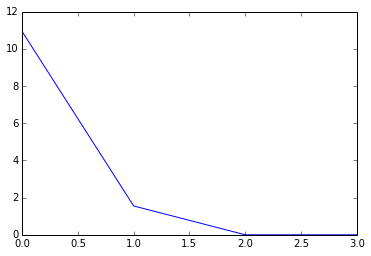

In [9]:
its = kc.summary()['iterations']
plot([i['gradient_max_norm'] for i in its])

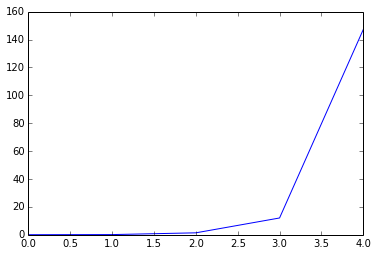

In [10]:
times = np.array([0.0721, 0.1533, 1.4150, 12.0537, 147.1182])
plt.plot(times)

In [11]:
print(times[1] / times[0])
print(times[2] / times[1])
print(times[3] / times[2])

2.12621359223
9.23026744945
8.51851590106
